In [145]:
import sqlite3
import pandas as pd
import sqlalchemy
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt




# S8. Normailización y estandarización. 

Coge un conjunto de datos de tema deportivo que te guste y **normaliza** los atributos categóricos en dummy. **Estandariza** 

los atributos numéricos con StandardScaler.

In [147]:
con= sqlite3.connect("database.sqlite")# importamos la base de datos. 


df = pd.read_sql_query( "SELECT * from Player_Attributes", con)
#Coge un conjunto de datos de tema deportivo que te guste y normaliza los atributos categóricos en dummy. Estandariza los atributos numéricos con StandardScaler.tributes
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [148]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [155]:
#  Buscaremos la capacidad de hacer gol en funcion de la pierna preferente, la curva,
#finalización, precisión de tiro libre, potencia de disparo, penalti, 

dff= df [[ 'finishing', 'curve', 'free_kick_accuracy',
        'shot_power',  'long_shots', 
        'penalties', "preferred_foot"]]
# Eliminamos los valores NaN o NUll
dff2 = dff.dropna()
dfnum=dff2[['finishing', 'curve', 'free_kick_accuracy',
        'shot_power',  'long_shots', 
        'penalties']]


dff.shape

(183978, 7)

In [157]:
dff2.shape# miramos la reducción dimensional 

(181265, 7)

<AxesSubplot:>

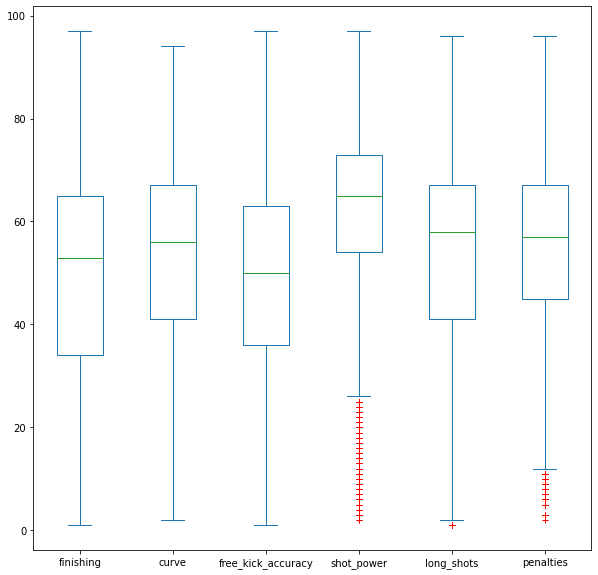

In [158]:
dfnum.plot(kind= "box", figsize= (10,10), sym="r+")# Miramos los valores atípicos de las variables numéricas

In [159]:
# eliminamos los valores atípicos. 
#miramos en shot_power, long_shot i Penalties, los quartiles. 

dfnum.describe()


,finishing,curve,free_kick_accuracy,shot_power,long_shots,penalties
count,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000
mean,49.939095,52.965675,49.380327,61.842799,53.367048,54.935950
std,19.047599,18.255788,17.824868,16.133940,18.374873,15.558855
min,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
25%,34.000000,41.000000,36.000000,54.000000,41.000000,45.000000
50%,53.000000,56.000000,50.000000,65.000000,58.000000,57.000000
75%,65.000000,67.000000,63.000000,73.000000,67.000000,67.000000
max,97.000000,94.000000,97.000000,97.000000,96.000000,96.000000


In [161]:
mean_power=dfnum.describe()["shot_power"][1]
std_power= dfnum.describe()["shot_power"][2]
mean_long=dfnum.describe()["long_shots"][1]
std_long= dfnum.describe()["long_shots"][2]
mean_pen=dfnum.describe()["penalties"][1]
std_pen= dfnum.describe()["penalties"][2]

# Sacamos los valores atípicos. 
dff3= dff2[((dff2["shot_power"]>= (-3*std_power+ mean_power) ) & (dff2["shot_power"]<= (3*std_power+ mean_power ))&
               (dff2["long_shots"]>= (-3*std_long+ mean_long) ) & (dff2["long_shots"]<= (3*std_long+ mean_long))&
               (dff2["penalties"]>= (-3*std_pen+ mean_pen) ) & (dff2["penalties"]<= (3*std_pen+ mean_pen )))]

dff3.shape
# y miramos de nuevo la reducción dimensional



(180442, 7)

In [166]:
# redefinimos la variable numérica. 
dfnum2=dff3[['finishing', 'curve', 'free_kick_accuracy',
        'shot_power',  'long_shots', 
        'penalties']]
# importamos  Standar Scaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
arrayss = ss.fit_transform(dfnum2)
colnombres= [ 'finishing', 'curve', 'free_kick_accuracy',
        'shot_power',  'long_shots', 
        'penalties']
dfss= pd.DataFrame(arrayss, columns= colnombres)
dfss.head()
# dejamos estandarizada la variable numérica 

,finishing,curve,free_kick_accuracy,shot_power,long_shots,penalties
0,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474
1,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474
2,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474
3,-0.376028,-0.503600,-0.650318,-0.509902,-1.073549,-0.525427
4,-0.376028,-0.503600,-0.650318,-0.509902,-1.073549,-0.525427


In [171]:
dfcat2=dff3[["preferred_foot"]]
# normalizamos las variables categóricas con variables  ficticias, pero antes eliminamos los valores NaN 




In [172]:
# miramos los valores de cada variable. 
dfcat2[["preferred_foot"]].value_counts()

preferred_foot
right             136211
left               44231
dtype: int64

In [173]:
var_cat= pd.get_dummies(dfcat2)
var_cat
# dejamos normalizada la variable categórica. 


,preferred_foot_left,preferred_foot_right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
183973,0,1
183974,0,1
183975,0,1
183976,0,1


In [ ]:
# concatenamos var_cat y dfss y damos por cerrado el ejercicio 1. 


In [174]:
norm= pd.concat([dfss, var_cat],axis=1)
norm.head()

,finishing,curve,free_kick_accuracy,shot_power,long_shots,penalties,preferred_foot_left,preferred_foot_right
0,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474,0.0,1.0
1,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474,0.0,1.0
2,-0.323157,-0.448425,-0.593873,-0.446690,-1.018635,-0.460474,0.0,1.0
3,-0.376028,-0.503600,-0.650318,-0.509902,-1.073549,-0.525427,0.0,1.0
4,-0.376028,-0.503600,-0.650318,-0.509902,-1.073549,-0.525427,0.0,1.0
